#### [Chapter 4](https://github.com/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_04.ipynb)
<!-- - [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Ziaeemehr/mndynamics/main?labpath=mndynamics%2Fexamples%2FChap_04.ipynb)
 -->
**Numerical Solution of the Hodgkin-Huxley ODEs**

- Börgers, C., 2017. An introduction to modeling neuronal dynamics (Vol. 66). Berlin: Springer.

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uncomment and run this line to install the package in colab
# !pip install "git+https://github.com/Ziaeemehr/mndynamics.git"

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from mndynamics.models.py.ch04 import HH_REFRACTORINESS, HH_SOLUTION

In [9]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['k', 'g', 'b', 'y'])
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['font.size'] = 16

#### HH_SOLUTION

In [10]:
obj = HH_SOLUTION()
obj()

Hudgkin Huxley Model


{'c': 1.0,
 'g_k': 36.0,
 'g_na': 120.0,
 'g_l': 0.3,
 'v_k': -82.0,
 'v_na': 45.0,
 'v_l': -59.0,
 'i_ext': 7.0,
 't_end': 50.0,
 'v0': -70.0,
 'dt': 0.01}

In [11]:
obj = HH_SOLUTION({"i_ext": 10.0, "v0":-50.0})
data = obj.simulate(tspan=np.arange(0, 50, 0.01))
data.keys()


dict_keys(['t', 'v', 'm', 'h', 'n'])

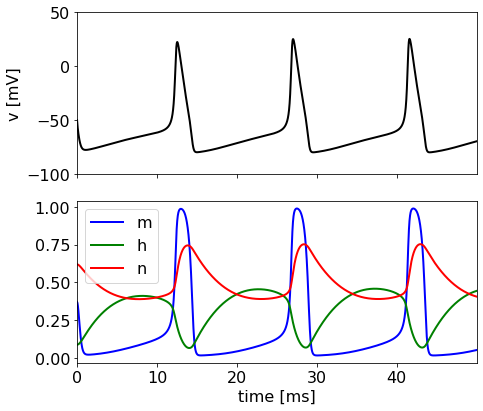

In [12]:
t = data["t"]
v = data["v"]
m = data["m"]
h = data["h"]
n = data["n"]


fig, ax = plt.subplots(2, figsize=(7, 6), sharex=True)
ax[0].plot(t, v, lw=2, c="k")

ax[1].plot(t, m, lw=2, label="m", c="b")
ax[1].plot(t, h, lw=2, label="h", c="g")
ax[1].plot(t, n, lw=2, label="n", c="r")


ax[0].set_xlim(min(t), max(t))
ax[0].set_ylim(-100, 50)
ax[1].set_xlabel("time [ms]")
ax[0].set_ylabel("v [mV]")
ax[0].set_yticks(range(-100, 100, 50))
ax[1].legend()
plt.tight_layout()

#### HH_LYMIT_CYCLE

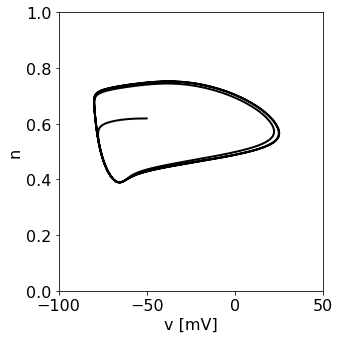

In [13]:
fig, ax = plt.subplots(1, figsize=(5, 5))

ax.plot(v, n, lw=2, c="k")

ax.set_xlim(-100, 50)
ax.set_ylim([0, 1])
ax.set_xlabel("v [mV]")
ax.set_ylabel("n")
plt.tight_layout()

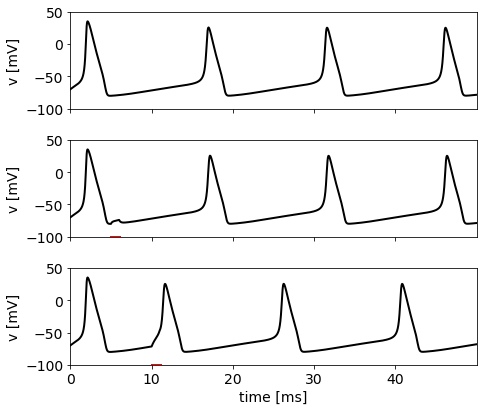

In [14]:
fig, ax = plt.subplots(3, figsize=(7, 6), sharex=True)

i_ext = 10.0
tspan = np.arange(0, 50.0, 0.01)
PULSE_ONSETS = [500.0, 5.0, 10.0]

for i in range(3):
    tPulse = PULSE_ONSETS[i]
    obj = HH_REFRACTORINESS({"i_ext": 10.0, "v0":-70.0})
    sol = obj.simulate(tspan, i_ext, tPulse)

    v = sol['v']
    t = sol['t']

    ax[i].plot(t, v, lw=2, c="k")
    ax[i].plot([tPulse, tPulse+1], [-100,-100], lw=3, c="r")
    ax[i].set_ylim([-100, 50])
    ax[i].set_ylabel("v [mV]", fontsize=14)
    ax[i].tick_params(labelsize=14)


ax[0].set_xlim(min(t), max(t))
ax[2].set_xlabel("time [ms]", fontsize=14)

ax[0].set_yticks(range(-100, 100, 50))

plt.tight_layout()